# stemgraphic.alpha

Demonstration of the text handling capabilities of <a href="http://www.stemgraphic.org">stemgraphic</a>. Available on pypi, github and at stemgraphic.org.

In [1]:
%matplotlib inline
from stemgraphic import alpha
from stemgraphic.stopwords import *

In [2]:
help(alpha)

Help on module stemgraphic.alpha in stemgraphic:

NAME
    stemgraphic.alpha - stemgraphic.alpha.

DESCRIPTION
    Stemgraphic provides a complete set of functions to handle everything related to stem-and-leaf plots. alpha is a
    module of the stemgraphic package to add support for categorical and text variables.
    
    The module also adds functionality to handle whole words, beside stem-and-leaf bigrams and n-grams.
    
    For example, for the word "alabaster":
    
    With word_ functions, we can look at the word frequency in a text, or compare it through a distance function
    (default to Levenshtein) to other words in a corpus
    
    With stem_ functions, we can look at the fundamental stem-and-leaf, stem would be 'a' and leaf would be 'l', for
    a bigram 'al'. With a stem_order of 1 and a leaf_order of 2, we would have 'a' and 'la', for a trigram 'ala', so
    on and so forth.

FUNCTIONS
    add_missing_letters(mat, stem_order, leaf_order, letters=None)
        Add mi

In [3]:
help(alpha.word_freq_plot)

Help on function word_freq_plot in module stemgraphic.alpha:

word_freq_plot(src, ascending=False, alpha_only=False, asFigure=False, caps=False, display=None, interactive=True, kind='barh', random_state=None, sort_by='count', stop_words=None, top=100)
    word frequency bar chart.
    
    This function creates a classical word frequency bar chart.
    
    :param src: Either a filename including path, a url or a ready to process text in a dataframe or a tokenized format.
    :param alpha_only: words only if True, words and numbers if False
    :param ascending: stem sorted in ascending order, defaults to True
    :param asFigure: if interactive, the function will return a plotly figure instead of a matplotlib ax
    :param caps: keep capitalization (True, False)
    :param display: if specified, sample that quantity of words
    :param interactive: interactive graphic (True, False)
    :param kind: horizontal bar chart (barh) - also 'bar', 'area', 'hist' and non interactive 'kde' and 

# The usual suspect: word frequency



### Word Frequency Plot

Interactive plot requested, but cufflinks not loaded. Falling back to matplotlib.


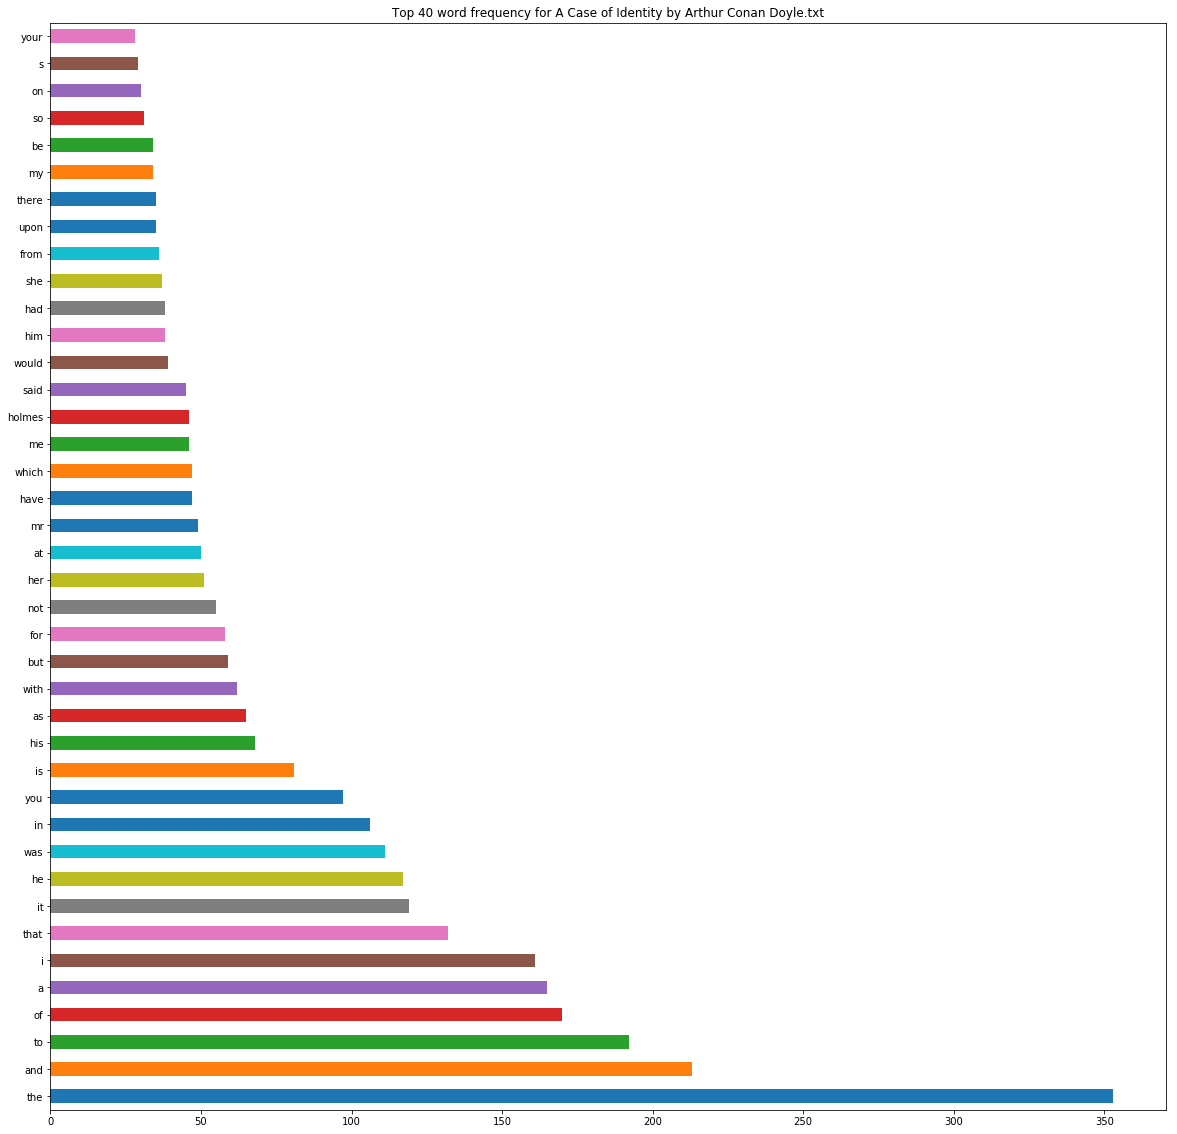

In [4]:
alpha.word_freq_plot('A Case of Identity by Arthur Conan Doyle.txt', top=40);

### Word Sunburst

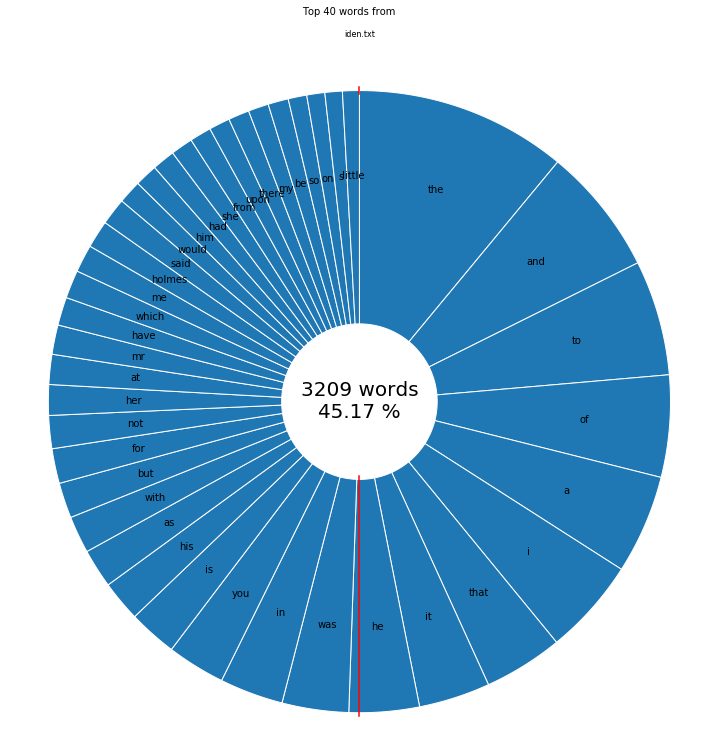

In [5]:
alpha.word_sunburst('iden.txt', top=40, sort_by='count', ascending=False);

# Interactivity

Let's try the same after importing cufflinks

In [6]:
import cufflinks as cf
cf.go_offline()

### Interactive Word Frequency Bar Chart Plot

In [7]:
alpha.word_freq_plot('iden.txt', top=40, stop_words=EN);

### Interactive Word Frequency Area Chart Plot

In [8]:
alpha.word_freq_plot('iden.txt', kind='area', top=40, stop_words=EN);

### Interactive Heatmap, Stem-and-Leaf

In [9]:
alpha.heatmap('iden.txt', alpha_only=True);

# Exploratory text analysis

Reading directly from disk, 'A Case of Identity' by Arthur Conan Doyle and getting a quick view of a few basic statistics, and the shape of the overall distribution using the default settings of stem_text.

### Text stem-and-leaf plot

In [10]:
alpha.stem_text('iden.txt');

: 
              index
count    750.000000
mean    6264.593333
std     3654.379436
min       41.000000
25%     3012.250000
50%     6160.000000
75%     9491.250000
max    12699.000000
sampled  750

D| o
F| r
v| i
J| a
P| l
N| oo
L| ey
Y| oo
k| en
j| aou
O| Ffu
q| uuuuu
W| eeeiii
e| aalnvy
M| aorryy
S| hhhitu
g| aaeirrr
A|  bnnnnn
T| hhhhhhhh
H| aeeeoooooooo
y| eoooooooooooo
p| aaehilrrrruuu
l| aeeeeeeiilooo
u| nnnnppppppssss
d| aaaeeiiioooorr
n| eiooooooooooooo
r| aeeeeeeeeeeeiiuu
c| aaaaaaehhhhhooooooorru
m| aaaaaeeeeeiiiiioouuuuyyyy
I|                       ttt
f| aaaaaeeeeiiiooooooooorrrrrtuu
i| dffmnnnnnnnnnnnnnnnsssssstttttttt
b| aaaaeeeeeeeeeeelloorrrrruuuuuuuuy
s|    aaaaaaaaaceeeeeehhhhhhhiillmooooooooppttuw
o| bcffffffffffffffffffffffnnnnnnnrrtttuuuuuvvwww
h| aaaaaaaaaaaeeeeeeeeeeeeeeeeeeeeeeiiiiiiiiiioouy
w| aaaaaaaaaaaaaaaeeeeeeeeehhhhhhhhhhhhhhiiiiiiiiiioooooooooo
a|                       bbbbccddfffglllllllmmnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnrrrrsssssssssttttttt
t|  eehhhhhh

### Graphical stem-and-leaf plot

The same, but graphically using stem_graphic

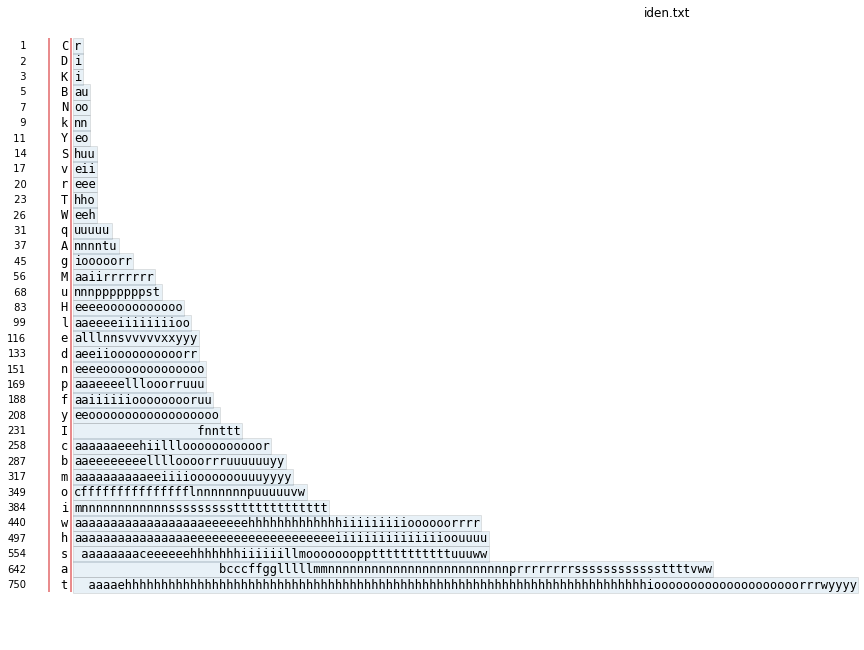

In [11]:
alpha.stem_graphic('iden.txt');

Sorting alphabetically, ignoring caps and using an english stop word list. Stem and / or leaf order can always be specified.

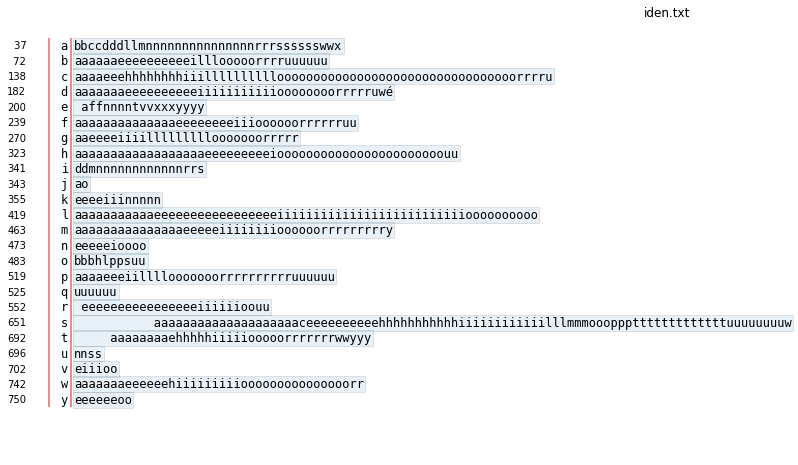

In [12]:
alpha.stem_graphic('iden.txt', caps=False, sort_by='alpha', stop_words=EN, stem_order=1, leaf_order=1);

### Sunburst stem-and-leaf plot

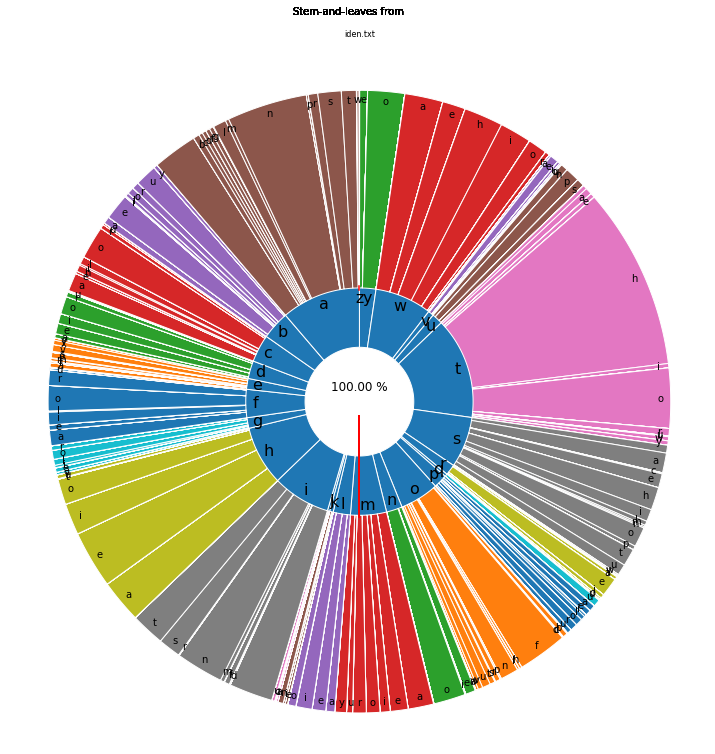

In [13]:
alpha.stem_sunburst('iden.txt');

### Interactive Stem-and-Leaf stacked frequency plot

As an example, limit stems to english vowels

In [14]:
alpha.stem_freq_plot('iden.txt', column=VOWELS);

# Comparisons

Comparing one word with a list of words

### Radar

metric=Levenshtein.distance by default

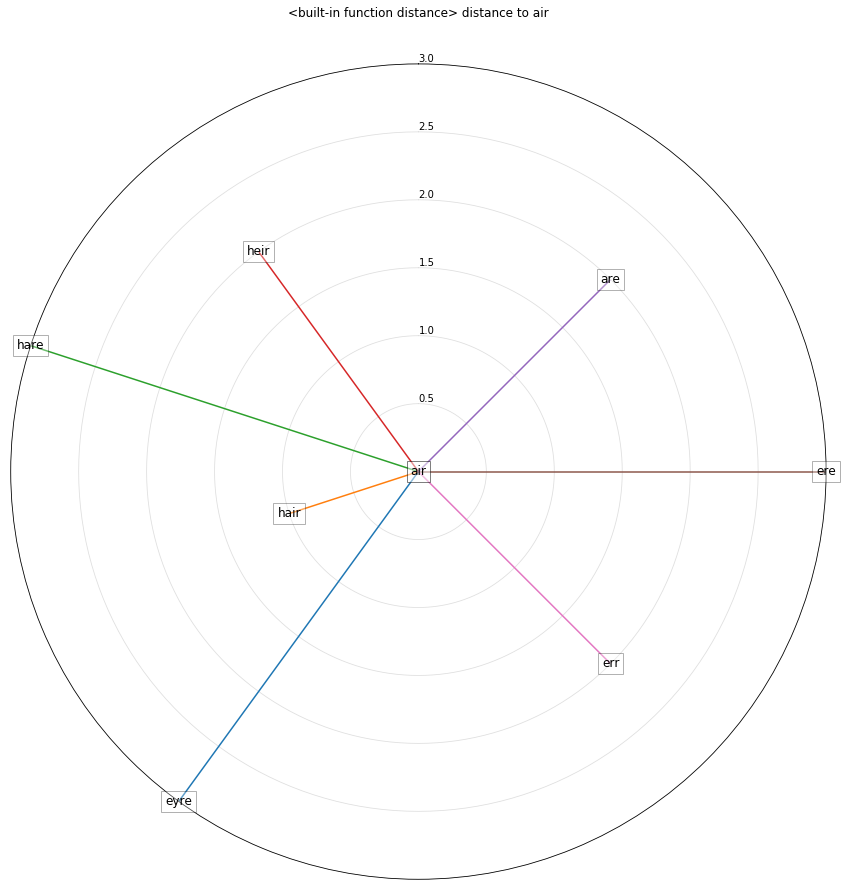

In [15]:
alpha.radar('air', ['are', 'hare', 'hair', 'eyre', 'heir', 'err', 'ere']);

### Heatmap Grid

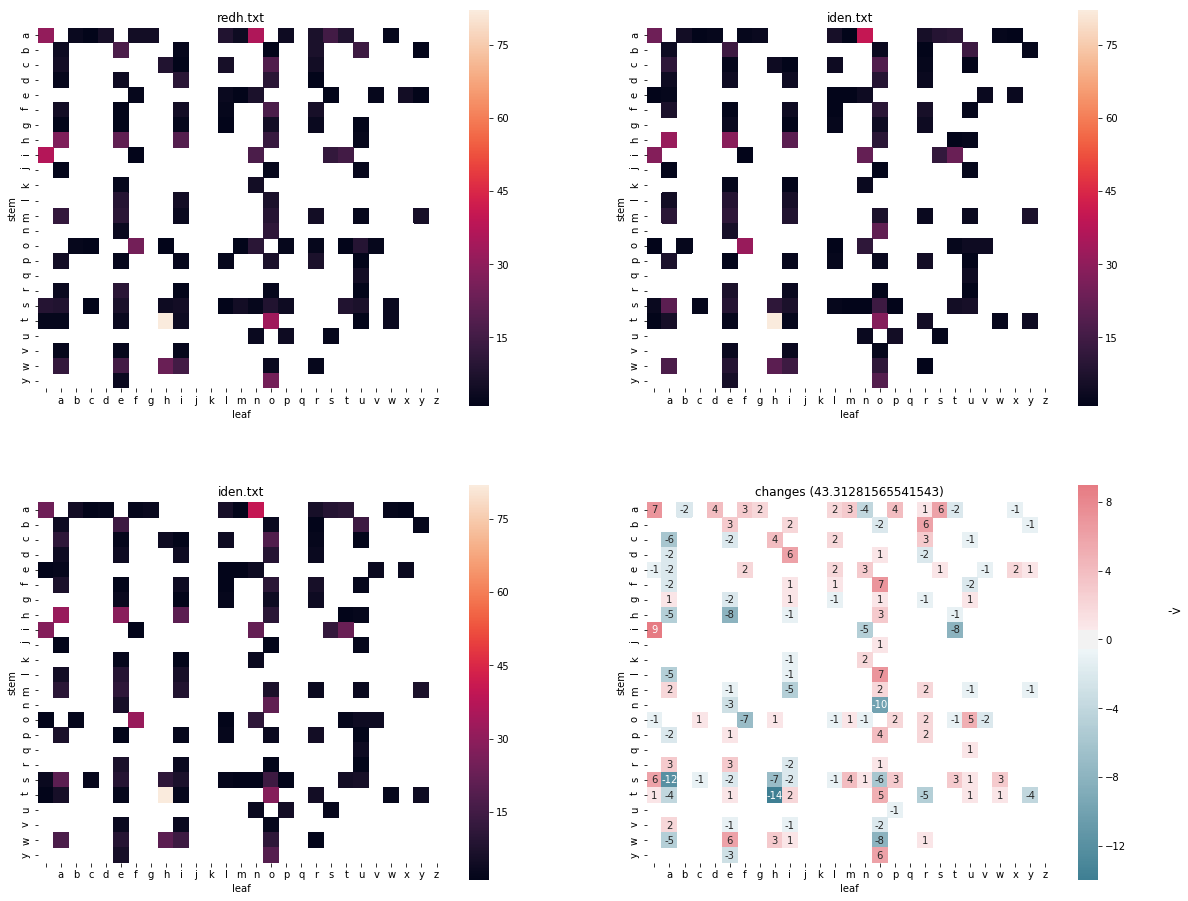

In [16]:
fig = alpha.heatmap_grid('redh.txt', 'iden.txt');

In [17]:
fig.savefig('heatmap_grid.pdf')

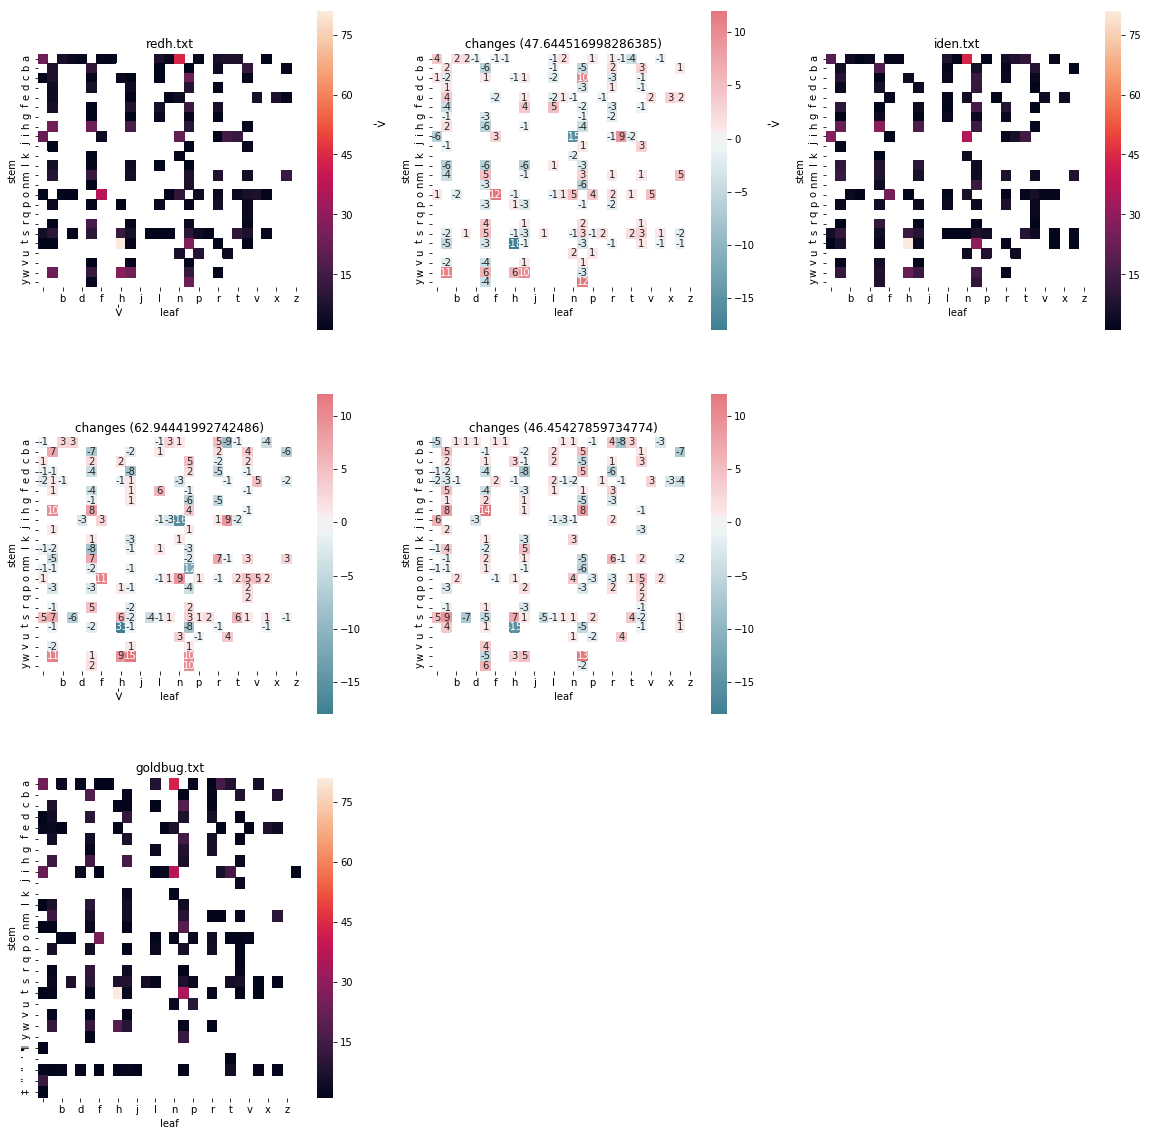

In [18]:
alpha.heatmap_grid('redh.txt', 'iden.txt', 'goldbug.txt');

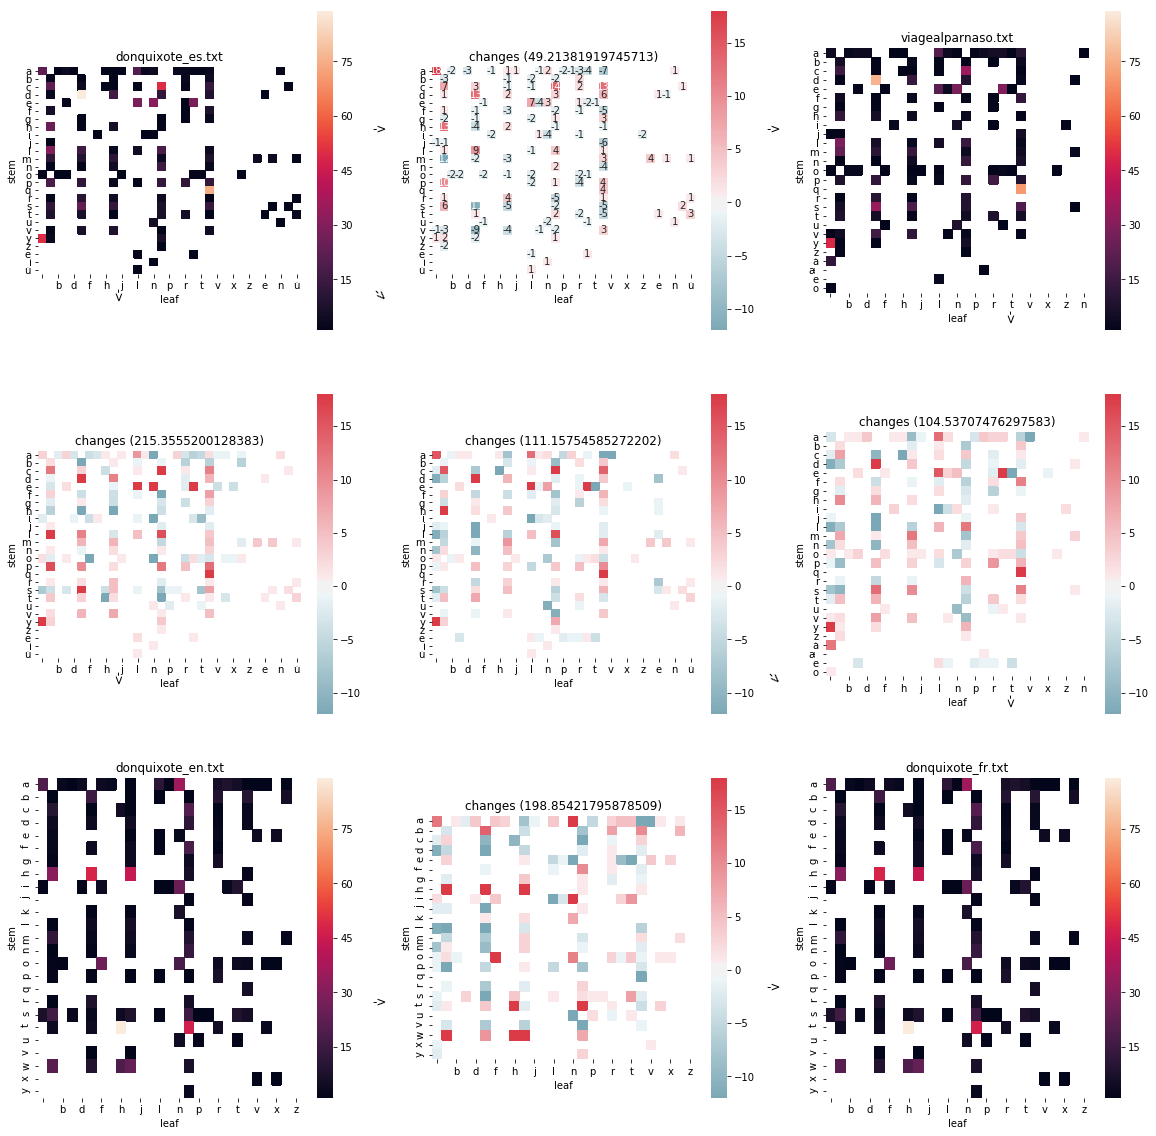

In [19]:
alpha.heatmap_grid('donquixote_es.txt', 'viagealparnaso.txt', 'donquixote_en.txt', 'donquixote_fr.txt');

### Back-to-back stem graphic

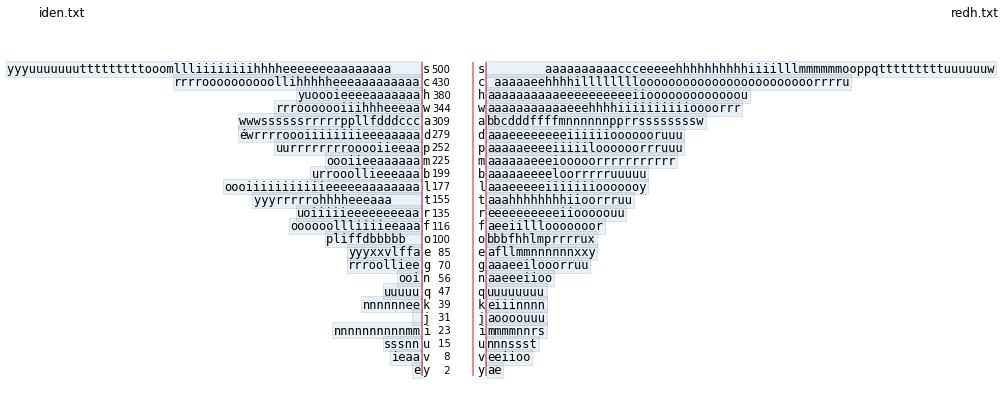

In [20]:
fig, ax = alpha.stem_graphic('redh.txt', 'iden.txt', caps=False, display=500, random_state=42, stop_words=EN);

### SVG, PNG, PDF etc

In [21]:
fig.savefig('red_headed_league_vs_a_case_of_identity.svg', bbox_inches='tight')

In [22]:
!ls -al red_headed_league_vs_a_case_of_identity.svg

-rw-rw-r-- 1 fdion fdion 126844 Feb 23 17:01 red_headed_league_vs_a_case_of_identity.svg
